# Clase: Gradient Descent

## Introducción

El **Gradient Descent (Descenso por Gradiente)** es un algoritmo utilizado para optimizar modelos de Machine Learning ajustando sus parámetros para minimizar una función de pérdida. Es como encontrar el punto más bajo de una colina: empezamos en un lugar aleatorio y seguimos caminando cuesta abajo hasta llegar al fondo.

---

## 1. Concepto básico

### ¿Qué es el gradiente?
El gradiente es como una brújula que nos dice en qué dirección y con qué rapidez cambiar para reducir el error del modelo. Es una medida del cambio de la función de pérdida con respecto a los parámetros.

### ¿Qué hace Gradient Descent?
Gradient Descent ajusta los parámetros del modelo (por ejemplo, los pesos en una regresión lineal) para minimizar la función de pérdida. En cada paso:
1. Calcula el gradiente (la pendiente de la pérdida con respecto a los parámetros).
2. Ajusta los parámetros moviéndose en la dirección opuesta al gradiente.

$$
\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$

Donde:
- $\theta$: Parámetro del modelo.
- $\alpha$: Tasa de aprendizaje (cuánto nos movemos en cada paso).
- $\frac{\partial J(\theta)}{\partial \theta}$: Gradiente de la función de pérdida $J(\theta)$.

---

## 2. Tipos de Gradient Descent

### 2.1 Batch Gradient Descent
Este método utiliza **todo el conjunto de datos** para calcular el gradiente en cada iteración.

#### **Ventajas**
- Suaviza el gradiente, lo que lo hace más estable.
- Converge de manera más precisa.

#### **Desventajas**
- Es lento y requiere mucha memoria en conjuntos de datos grandes.

### 2.2 Stochastic Gradient Descent (SGD)
SGD calcula el gradiente usando **un único ejemplo** de datos en cada iteración.

#### **Ventajas**
- Es rápido y eficiente para grandes conjuntos de datos.
- Puede escapar de mínimos locales debido a su naturaleza ruidosa.

#### **Desventajas**
- Puede ser inestable y no converger fácilmente.

### 2.3 Mini-Batch Gradient Descent
Este método combina los dos anteriores, calculando el gradiente sobre un **pequeño subconjunto** de datos en cada iteración.

#### **Ventajas**
- Es un equilibrio entre estabilidad y eficiencia.
- Se usa comúnmente en Deep Learning.

#### **Desventajas**
- Aún requiere elegir un tamaño de lote adecuado.

---

## 3. Ejemplo paso a paso: Gradient Descent aplicado a la regresión lineal

Vamos a implementar un ejemplo simple para ajustar una línea recta a un conjunto de datos usando Gradient Descent.

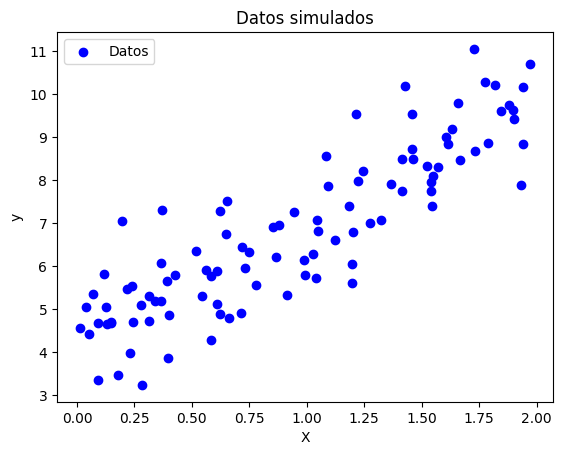

In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Generar datos simulados
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizar los datos
plt.scatter(X, y, color="blue", label="Datos")
plt.title("Datos simulados")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 4. Implementación de Gradient Descent
Paso 1: Inicialización de parámetros

In [2]:
# Inicializar parámetros
theta = np.random.randn(2, 1)  # Pesos iniciales
learning_rate = 0.1  # Tasa de aprendizaje
n_iterations = 1000  # Número de iteraciones
m = len(X)  # Número de ejemplos

Paso 2: Añadir el término de sesgo $X_0=1$

In [3]:
# Añadir un término de sesgo a X
X_b = np.c_[np.ones((m, 1)), X]  # X_b = [1, X]

Paso 3: Definir la función de pérdida


La función de pérdida es el Error Cuadrático Medio (MSE):

$$
J_(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(\bar{y}_i - y_i)^2
$$
 
Paso 4: Algoritmo de Gradient Descent

In [4]:
# Implementar Gradient Descent
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # Gradiente
    theta -= learning_rate * gradients  # Actualizar parámetros

print(f"Parámetros finales: {theta}")

Parámetros finales: [[4.21509616]
 [2.77011339]]


---
## 5. Visualización de los resultados

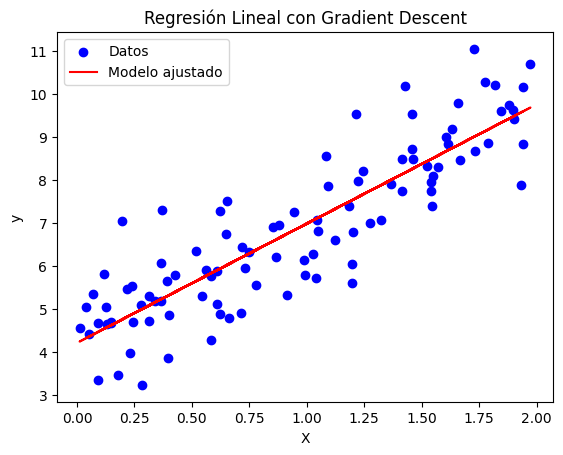

In [5]:
# Visualizar los resultados
y_pred = X_b.dot(theta)
plt.scatter(X, y, color="blue", label="Datos")
plt.plot(X, y_pred, color="red", label="Modelo ajustado")
plt.title("Regresión Lineal con Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

---
## 6. Best Practices
1. Escalar los datos:

    - Gradient Descent funciona mejor con características escaladas (por ejemplo, con StandardScaler) para evitar que una característica domine a las demás.
2. Ajustar la tasa de aprendizaje:

    - Una tasa demasiado alta puede hacer que no converja.
    - Una tasa demasiado baja hará el aprendizaje lento.
3. Usar mini-batches:

    - En problemas grandes, mini-batches equilibran estabilidad y velocidad.
4. Monitorear la convergencia:

    - Supervisa el valor de la función de pérdida para asegurarte de que está disminuyendo.
5. Evitar el sobreajuste:

    - Usa regularización (L1 o L2) para prevenir un modelo demasiado complejo.

## 7. Pros y Contras de Gradient Descent

| **Pros**                                     | **Contras**                                     |
|---------------------------------------------|-----------------------------------------------|
| Funciona bien para modelos con muchas características. | Puede ser lento para funciones de pérdida complejas. |
| Es simple de implementar.                   | Sensible a la tasa de aprendizaje.            |
| Compatible con datos grandes (usando SGD o mini-batches). | Puede atascarse en mínimos locales.           |


## 8. Tipos de Gradient Descent: Comparación gráfica

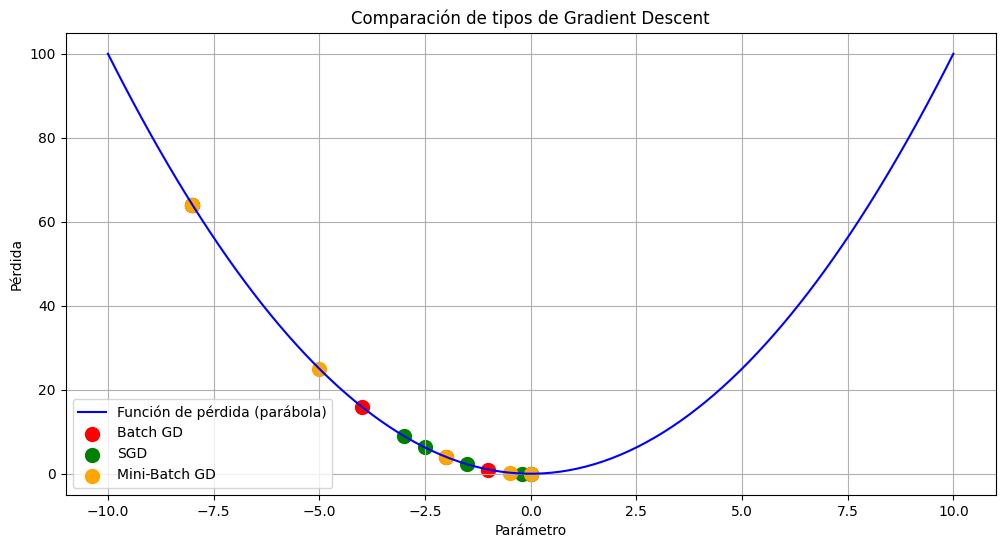

In [6]:
# Visualización comparativa de Batch, SGD y Mini-Batch
def gradient_descent_visualization():
    x = np.linspace(-10, 10, 100)
    y = x**2

    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label="Función de pérdida (parábola)", color="blue")
    
    # Simulación de pasos de Batch Gradient Descent
    batch_steps = [-8, -4, -2, -1, 0]
    plt.scatter(batch_steps, [s**2 for s in batch_steps], color="red", label="Batch GD", s=100)
    
    # Simulación de pasos de SGD
    sgd_steps = [-8, -3, -2.5, -1.5, -0.2, 0]
    plt.scatter(sgd_steps, [s**2 for s in sgd_steps], color="green", label="SGD", s=100)
    
    # Simulación de Mini-Batch Gradient Descent
    minibatch_steps = [-8, -5, -2, -0.5, 0]
    plt.scatter(minibatch_steps, [s**2 for s in minibatch_steps], color="orange", label="Mini-Batch GD", s=100)
    
    plt.title("Comparación de tipos de Gradient Descent")
    plt.xlabel("Parámetro")
    plt.ylabel("Pérdida")
    plt.legend()
    plt.grid()
    plt.show()

gradient_descent_visualization()

## Conclusión
Gradient Descent es un pilar fundamental en Machine Learning, utilizado para ajustar los parámetros de modelos de forma eficiente. Comprender sus variantes y aplicar las mejores prácticas asegura modelos precisos y robustos. Experimenta ajustando la tasa de aprendizaje y observa cómo afecta al rendimiento.